In [201]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [211]:
BTC = yf.download('BTC-USD', start='2023-06-03', end='2023-06-04',  interval = '1m')


[*********************100%***********************]  1 of 1 completed


In [213]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-03 00:00:00,27252.324219,27252.324219,27252.324219,27252.324219,27252.324219,0
2023-06-03 00:01:00,27251.412109,27251.412109,27251.412109,27251.412109,27251.412109,0
2023-06-03 00:02:00,27249.333984,27249.333984,27249.333984,27249.333984,27249.333984,0
2023-06-03 00:03:00,27249.101562,27249.101562,27249.101562,27249.101562,27249.101562,0
2023-06-03 00:04:00,27238.392578,27238.392578,27238.392578,27238.392578,27238.392578,0
...,...,...,...,...,...,...
2023-06-03 23:54:00,27066.750000,27066.750000,27066.750000,27066.750000,27066.750000,204288
2023-06-03 23:55:00,27062.585938,27062.585938,27062.585938,27062.585938,27062.585938,7171584
2023-06-03 23:56:00,27067.320312,27067.320312,27067.320312,27067.320312,27067.320312,0


In [214]:
ETH = yf.download('ETH-USD', start='2023-06-03', end='2023-06-04',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [215]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-03 00:00:00,1907.420776,1907.420776,1907.420776,1907.420776,1907.420776,0
2023-06-03 00:01:00,1907.648804,1907.648804,1907.648804,1907.648804,1907.648804,0
2023-06-03 00:02:00,1907.594360,1907.594360,1907.594360,1907.594360,1907.594360,0
2023-06-03 00:03:00,1907.721924,1907.721924,1907.721924,1907.721924,1907.721924,0
2023-06-03 00:04:00,1907.098145,1907.098145,1907.098145,1907.098145,1907.098145,0
...,...,...,...,...,...,...
2023-06-03 23:54:00,1891.692383,1891.692383,1891.692383,1891.692383,1891.692383,0
2023-06-03 23:55:00,1891.638062,1891.638062,1891.638062,1891.638062,1891.638062,1059584
2023-06-03 23:56:00,1891.857666,1891.857666,1891.857666,1891.857666,1891.857666,0


In [253]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1429
mu_2 = lr2.mean() * 1429
sigma_1 = lr1.std() * np.sqrt(1429)
sigma_2 = lr2.std() * np.sqrt(1429)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.5
delta = 0.8
T = 1
M = len(BTC)

In [254]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [255]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
beta = result.slope

In [256]:
rho

0.8385612668740738

In [257]:
beta

0.9947589511597633

In [258]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [259]:
S1_0

27251.412109375

In [260]:
S2_0


1907.6488037109375

In [261]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [262]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

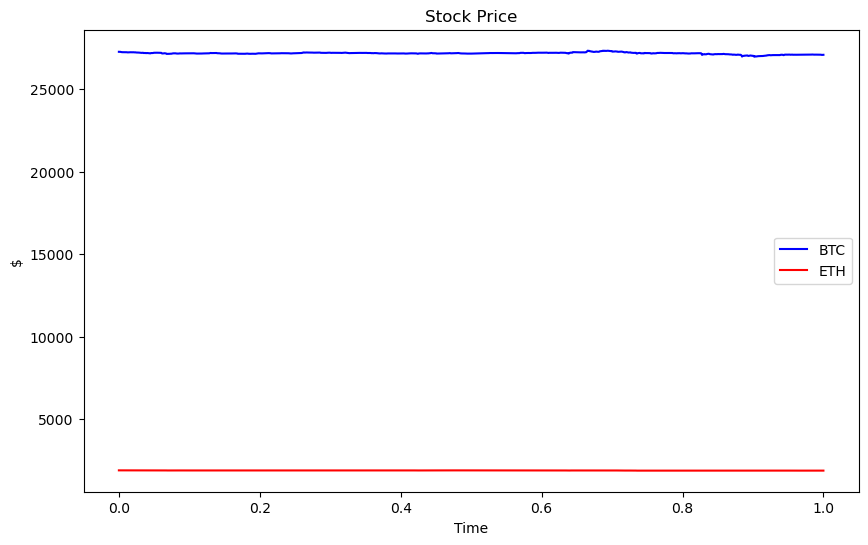

In [284]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

In [264]:
BTC['price_movement'] = BTC['Close'].pct_change()
ETH['price_movement'] = ETH['Close'].pct_change()

In [265]:
BTC.dropna(inplace=True)
ETH.dropna(inplace=True)

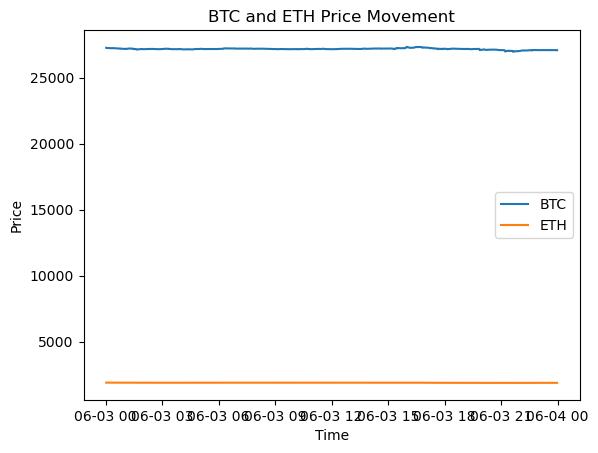

In [266]:
fig, ax = plt.subplots()
ax.plot(BTC.index, BTC['Close'], label='BTC')

# Plot ETH price movement
ax.plot(ETH.index, ETH['Close'], label='ETH')

# Set plot title and labels
ax.set_title('BTC and ETH Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Price')

# Add a legend
ax.legend()

# Display the plot
plt.show()

Text(0, 0.5, 'Price')

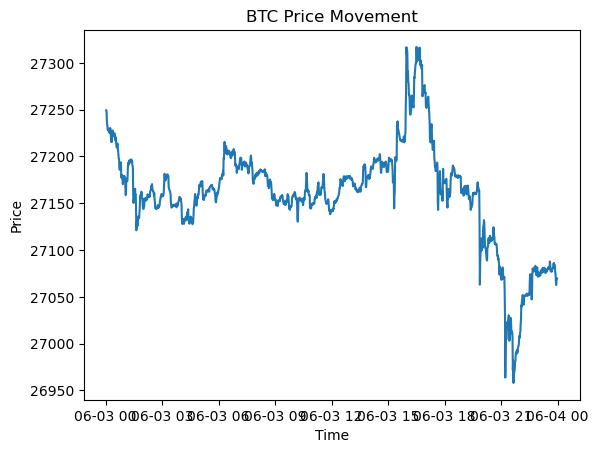

In [267]:
fig_btc, ax_btc = plt.subplots()
ax_btc.plot(BTC.index, BTC['Close'])
ax_btc.set_title('BTC Price Movement')
ax_btc.set_xlabel('Time')
ax_btc.set_ylabel('Price')

Text(0, 0.5, 'Price')

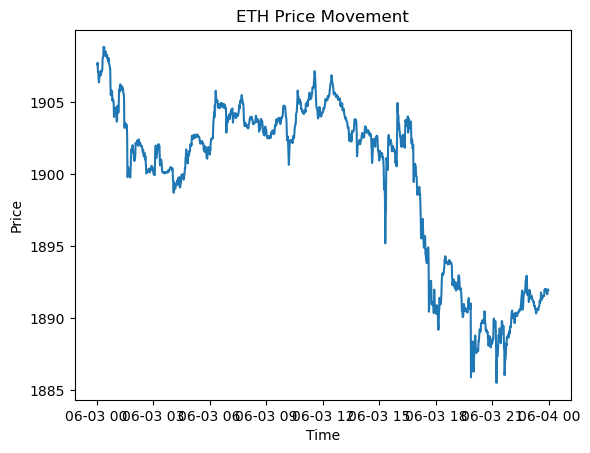

In [268]:
fig_eth, ax_eth = plt.subplots()
ax_eth.plot(ETH.index, ETH['Close'])
ax_eth.set_title('ETH Price Movement')
ax_eth.set_xlabel('Time')
ax_eth.set_ylabel('Price')

Text(0.5, 1.0, 'Cointegration - z')

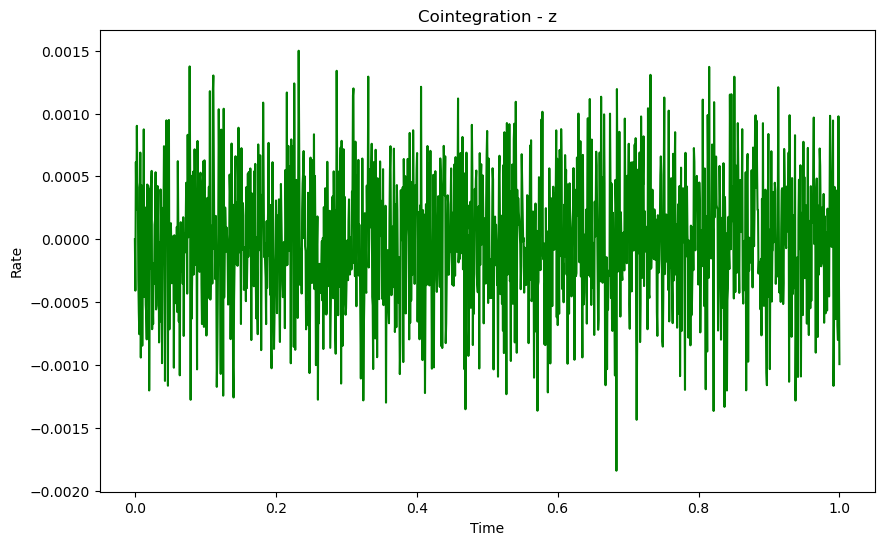

In [269]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Cointegration - z')


In [270]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t-1]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t-1]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))


Text(0.5, 1.0, 'Weights')

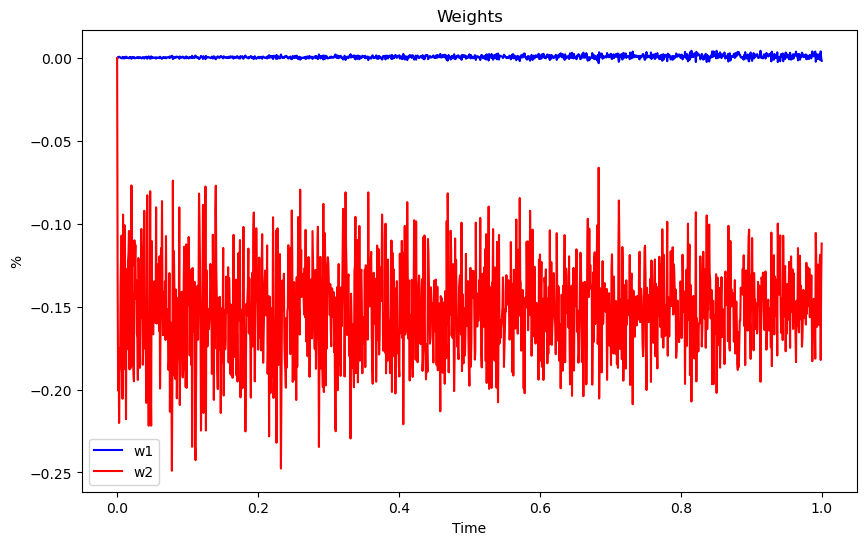

In [271]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Wealth')

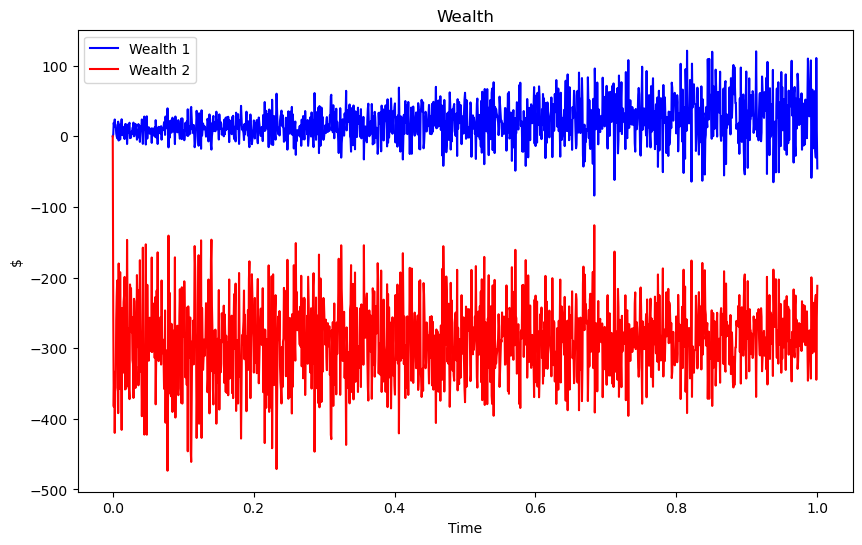

In [272]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [273]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

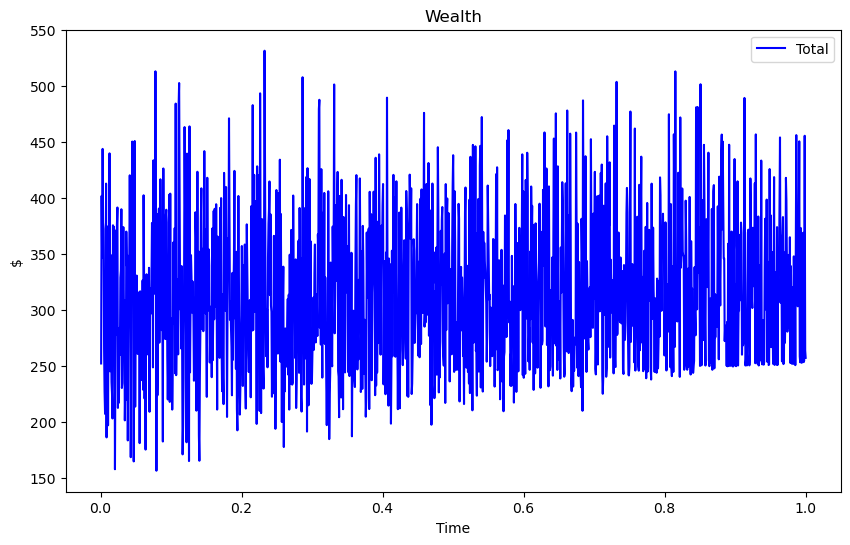

In [274]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

Text(0.5, 1.0, 'Comparison')

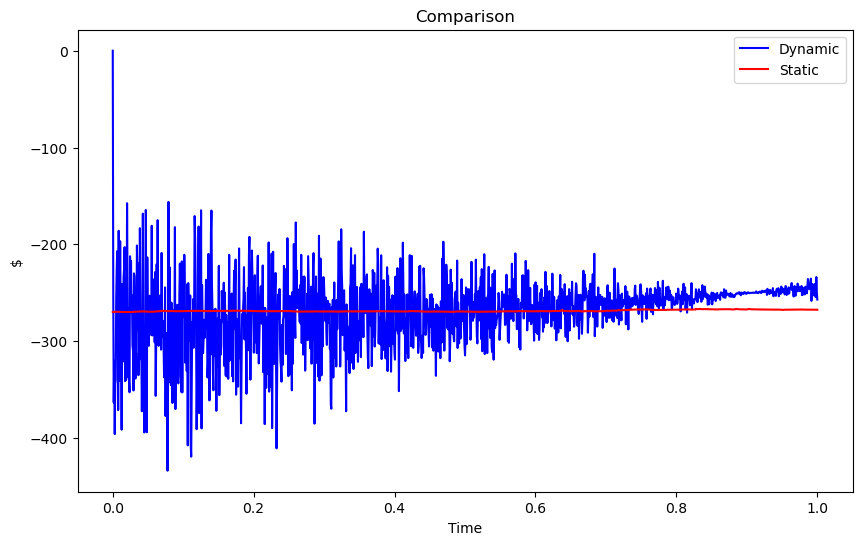

In [275]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [276]:
Wealth[1]  # Inital Wealth

array([252.03991366])

In [277]:
Wealth[-1]  # Ending Wealth

array([257.0569589])

In [278]:
Return = (Wealth[-1] - Wealth[1])/Wealth[1]  # Return
Return.item()

0.019905756862293972

In [279]:
static = abs(Pi_1.mean() * S1) + abs(Pi_2.mean() * S2)

In [280]:
static[1]

array([311.11655311])

In [281]:
static[-1]

array([308.58573248])

In [282]:
Return = (static[-1] - static[1])/[1]  # Return
Return.item()

-2.530820629390064